## Step 1: Import The Data

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')

In [2]:
df = pd.read_csv('Ntu_Orders.csv')

In [3]:
df.head()

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,UnitPrice,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift
0,26914456,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971960,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,399.0,-25.0,0.0,374.0,2017-01-03 23:11:47.207,Finish,SevenEleven,SevenEleven,NaN,False
1,26914457,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971961,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,399.0,-25.0,0.0,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False
2,26767644,20170101,C8B989DB-05F9-42D3-BD4F-E203482C5E58,26825136,1317,10118,b'\x1d\x8f}\x12lu>.&\xfc\xbc\xe0\xd2\xad\xe5\x...,Web,Brand,Mobile,...,350.0,-34.0,0.0,316.0,2017-01-01 17:21:32.113,Finish,Family,Family,NaN,False
3,26780512,20170101,C39E36F7-5091-48DA-BE8F-8CE043E009EE,26837997,1317,10036,"b'&QI#u)\xf8\xf7\n6\x01~\xd1\xf3,\x1f\xb8\xe3\...",Web,Brand,Mobile,...,540.0,-57.0,0.0,483.0,2017-01-01 21:41:58.153,Finish,Family,Family,NaN,False
4,26823950,20170102,7D87099A-B49C-4136-A8E9-F76BB5588B19,26881442,1317,10268,b'\xfd\x0b\x9ee\xdc\xaea@\x102;jX\xfek\x99m\x1...,Web,Brand,Mobile,...,445.0,-44.0,0.0,401.0,2017-01-02 15:37:33.610,Finish,Family,Family,NaN,False


In [4]:
df.shape

(2268348, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268348 entries, 0 to 2268347
Data columns (total 27 columns):
SalesOrderSlaveId              int64
DateId                         int64
MemberId                       object
TradesOrderSlaveId             int64
ShopId                         int64
SalePageId                     int64
TradesOrderGroupCode           object
TrackSourceTypeDef             object
TrackChannelTypeDef            object
TrackDeviceTypeDef             object
LevelOneCategoryName           object
LevelTwoCategoryName           object
LevelThreeCategoryName         object
LevelFourCategoryName          object
IsMajor                        bool
IsGift                         bool
Quantity                       int64
UnitPrice                      float64
PromotionDiscount              float64
EcouponDiscount                float64
SalesOrderSlaveTotalPayment    float64
SalesOrderSlaveDateTime        object
SalesOrderSlaveStatusDef       object
PayProfileTypeDef  

## Step 2: Exploratory Data Analysis

### 2.1 Data Preprocessing

In [8]:
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')

### 2.2 Data Description

Unit Price: Lets take a look at how unit price is distributed.

In [10]:
print(df['UnitPrice'].describe())

count    2.268348e+06
mean     2.606204e+02
std      1.355568e+02
min      0.000000e+00
25%      1.990000e+02
50%      1.990000e+02
75%      3.200000e+02
max      3.500000e+03
Name: UnitPrice, dtype: float64


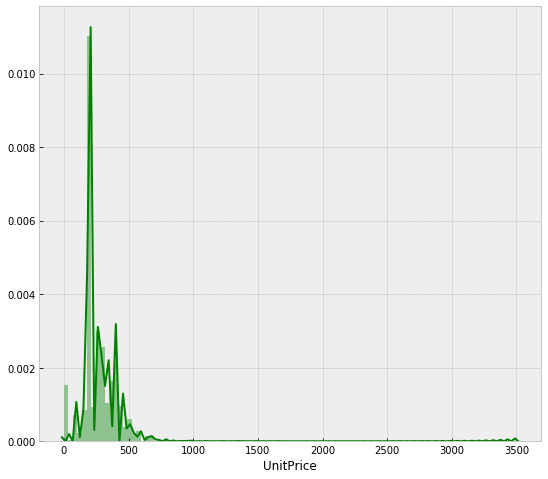

In [12]:
plt.figure(figsize=(9, 8))
sns.distplot(df['UnitPrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

### 2.2 Data Filtering

Find sales data with quantity larger than 1.

In [29]:
df[df['Quantity'] > 1]

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift,new_DateId
6863,27641010,20170115,92F342F5-C557-4FB2-9A7A-57EE93C1F7C8,27698599,1317,6736,b'U\x90vc:\x80\xd1\x0f(\x9f\xb3\xdb\x83\xf4{\x...,iOSApp,Brand,Mobile,...,0.0,-37.0,261.0,2017-01-15 21:43:58.147,Finish,SevenEleven,SevenEleven,133.0,False,2017-01-15
6864,27845417,20170119,524988E2-A374-4ECA-B0C0-2093BB0D1EEB,27903045,1317,9582,"b' ~\xd0\xdbN\x88v\x03\xda%PK\xf3,-+\xf9~Mc'",iOSApp,Brand,Mobile,...,0.0,-26.0,274.0,2017-01-19 12:11:57.307,Finish,SevenEleven,SevenEleven,133.0,False,2017-01-19
6866,27746936,20170117,4197D6AB-4375-413F-86FA-2541CBB67049,27804553,1317,8677,b' \x11\xb9s\x98\x04\xa5\xe1^\x13\x03\xd6\xf8\...,Web,Brand,Mobile,...,0.0,-82.0,516.0,2017-01-17 19:29:59.587,Finish,SevenEleven,SevenEleven,133.0,False,2017-01-17
6867,28489918,20170131,2A8C7A74-26FC-450C-A0A6-BE3547503763,28547770,1317,7151,b'\x920\xfe\xca\xdd\x9b\x85W\x06v\nNU<o\xb5\x0...,Web,Brand,Mobile,...,0.0,-50.0,340.0,2017-01-31 18:29:38.380,Finish,SevenEleven,SevenEleven,130.0,False,2017-01-31
6868,28361104,20170129,58606276-4EE4-4637-A3CC-7E4BB4EB7E7E,28418880,1317,10376,b'\x12N\xa8\xa2\x12\xe2|h\xc8\xa5\xa4H\xe0\xad...,Web,Brand,Mobile,...,0.0,0.0,3.0,2017-01-29 02:02:48.997,Finish,SevenEleven,SevenEleven,130.0,False,2017-01-29
6869,28361106,20170129,58606276-4EE4-4637-A3CC-7E4BB4EB7E7E,28418882,1317,10376,b'\x12N\xa8\xa2\x12\xe2|h\xc8\xa5\xa4H\xe0\xad...,Web,Brand,Mobile,...,0.0,0.0,3.0,2017-01-29 02:02:49.030,Finish,SevenEleven,SevenEleven,130.0,False,2017-01-29
6870,28870964,20170207,15337531-D92B-4B9D-A5E6-0529B1899430,28928870,1317,10610,"b'\xbc\'\x07""q"" |\xa1\xe7\xd0\x96R\xfbB?\xfca\...",Web,Brand,PC,...,0.0,-5.0,575.0,2017-02-07 00:48:43.863,Finish,SevenEleven,SevenEleven,134.0,False,2017-02-07
6871,27901089,20170120,4A2D7D19-2D37-4DCF-93B2-D2F700EDE466,27958735,1317,9440,b'{\r\xc1\xb0;\xefM0]\xd8Z \x9cKP\t\xee\xbe\x83.',AndroidApp,Brand,Mobile,...,0.0,-100.0,497.0,2017-01-20 10:02:41.640,Finish,SevenEleven,SevenEleven,133.0,False,2017-01-20
6872,27735790,20170117,13DC2161-FBD2-4838-9D47-48FC5406B657,27793406,1317,10456,b'3\xc8\xd7S\x07\x94\r\xf7RY\x01\x02a\xce\xa8....,AndroidApp,Brand,Mobile,...,0.0,-50.0,746.0,2017-01-17 15:04:45.450,Cancel,SevenEleven,SevenEleven,128.0,False,2017-01-17
6873,28361105,20170129,58606276-4EE4-4637-A3CC-7E4BB4EB7E7E,28418881,1317,10376,b'\x12N\xa8\xa2\x12\xe2|h\xc8\xa5\xa4H\xe0\xad...,Web,Brand,Mobile,...,0.0,0.0,4.0,2017-01-29 02:02:49.013,Finish,SevenEleven,SevenEleven,130.0,False,2017-01-29


### 2.3 Data Grouping

In [31]:
data = df.groupby(by='new_DateId')['Quantity'].sum()
data.head(10)

new_DateId
2017-01-01    3823
2017-01-02    5105
2017-01-03    3623
2017-01-04    2889
2017-01-05    2843
2017-01-06    2391
2017-01-07    2641
2017-01-08    2335
2017-01-09    2119
2017-01-10    2470
Name: Quantity, dtype: int64

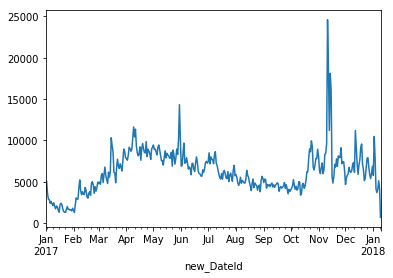

In [32]:
data.plot()